# Import data

In [279]:
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [280]:
print(set(train["wheezy-copper-turtle-magic"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# The strategy

Following many different source ([Chris Deotte's post](https://www.kaggle.com/c/instant-gratification/discussion/92930#latest-534847), [Chris Deotte's kernel](https://www.kaggle.com/cdeotte/support-vector-machine-0-925)), a distinct model is built for each distinct value of variable $\mathrm{wheezy-copper-turtle-magic}$. Let's start with model 0.

## Model 0

In [336]:
train_1 = train.loc[train["wheezy-copper-turtle-magic"]==1,].copy()
test_1 = test.loc[test["wheezy-copper-turtle-magic"]==1,].copy()
train_1.shape

(510, 258)

In [337]:
test_1.shape

(250, 257)

In [338]:
train_1.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
550,4d1b3f7fff691e39bc3bf0bebaf76eab,-0.652685,-0.320448,-0.990136,0.123433,0.872434,-0.976576,0.986943,-0.654385,0.731564,0.285962,1.499044,-1.328540,0.395294,-3.298451,-1.181058,0.331352,0.366248,0.904716,0.151776,-0.647328,1.304950,-0.199931,5.713286,1.359669,-0.249997,-0.747654,-0.060289,0.635618,0.356520,-1.527237,0.559137,3.483580,-0.384161,1.607351,-0.663717,-0.334949,-1.241209,-0.845180,-1.387320,...,0.421367,-0.482724,-0.024148,0.559462,-0.488167,1.918099,0.766928,0.870616,0.672433,1.271420,1.584735,-4.585459,-8.365499,-1.132061,0.063775,-1.065590,1.838345,0.515303,-2.837308,0.779924,-6.486720,0.656137,-0.079828,0.809018,-4.332438,0.243049,-1.371040,-2.069968,2.786746,0.123676,-0.751551,2.214634,0.036100,0.559592,-0.196727,-0.045499,-0.875327,0.949601,0.532729,1
793,98a8077588b7544a04931dad6ba353e9,1.100477,0.146391,0.548201,-0.743063,-0.776455,0.784679,2.884915,4.547408,-1.348984,-0.528185,-0.483675,-7.797243,-1.610884,-4.016878,-0.556223,0.005078,-0.715434,0.361788,-0.535948,-1.184070,0.641151,0.532955,6.334253,0.324357,5.651362,0.292334,-0.311029,-0.360452,-1.716842,0.489620,0.936628,5.507575,1.135696,1.592396,-0.692802,-0.947075,-0.375722,-0.384180,-0.439077,...,-0.668532,1.612571,2.504006,-0.424034,-0.471309,0.465078,-1.254199,-0.031616,0.030368,-0.021062,-0.555780,0.162324,-4.772068,-1.206169,-0.146731,7.322311,0.341191,0.185873,5.185510,-1.907479,1.264691,-0.212111,-0.494665,0.151130,1.995123,0.408136,0.282075,2.361225,-1.537342,-1.573899,0.127049,-0.591817,-0.694301,-0.356082,-0.689719,-0.164489,0.595378,-0.020808,0.527682,0
1218,ffe5a67090871f16d50d157c8218597e,1.603370,1.622184,-1.537069,-0.232444,-0.123593,1.18

The number of observations is comparable to the number of columns: this require some classifiers like Random Forest or SVM. Preparing data:

In [339]:
Y = train_1["target"]
X = train_1.drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X.shape

(510, 255)

In [340]:
import numpy as np
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=10)
scores_rf = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.6173144586894587 +/- 0.0877966506448753


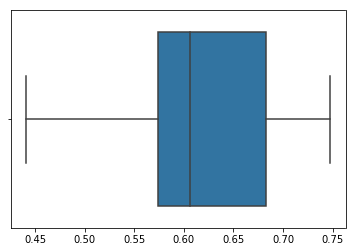

In [341]:
import seaborn as sns

sns.boxplot(x=scores_rf)

In [342]:
model = RandomForestClassifier(n_estimators=100)
scores_rf = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.7667535612535612 +/- 0.053555514075782726


In [343]:
model = RandomForestClassifier(n_estimators=200)
scores_rf = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.803449074074074 +/- 0.043067663772019524


In [344]:
model = RandomForestClassifier(n_estimators=400)
scores_rf = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.8321460113960113 +/- 0.053546683570976736


In [345]:
model = RandomForestClassifier(n_estimators=600)
scores_rf = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.8286684472934474 +/- 0.05641620459179883


Trying with SVM:

In [346]:
from sklearn import svm

model = svm.SVC()
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.932710113960114 +/- 0.0453191753018451


In [347]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [348]:
model = svm.SVC(kernel='linear')
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.7732877492877492 +/- 0.0682936609594128


In [349]:
model = svm.SVC(kernel='poly')
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.9024230769230769 +/- 0.05095053643973781


In [350]:
model = svm.SVC(kernel='poly', degree=2)
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.9257877492877494 +/- 0.0399390664510972


In [351]:
model = svm.SVC(kernel='poly', degree=4)
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.9333005698005697 +/- 0.043201905837377035


In [352]:
model = svm.SVC(kernel='poly', degree=5)
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.897386752136752 +/- 0.04282444191963131


Thus the most promising approach is to use a polynomial of degree 4 as kernel.

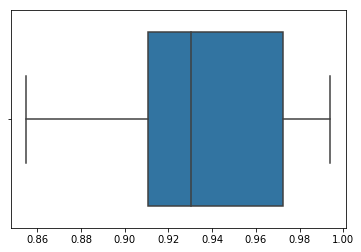

In [353]:
model = svm.SVC(kernel='poly', degree=4)
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')

sns.boxplot(x=scores_svm)

## Adding Features

In [354]:
columns = train.columns[1:-1]

first_name = [i.split("-")[0] for i in columns]
print(set(first_name))
print(len(first_name))
print(len(set(first_name)))
for first in first_name:
    filter_col = [col for col in train_1 if col.startswith(first)]
    test_1.loc[:, first+"-mean"] = test_1.loc[:, filter_col].mean(axis=1)
    train_1.loc[:, first+"-mean"] = train_1.loc[:, filter_col].mean(axis=1)
    test_1.loc[:, first+"-std"] = test_1.loc[:, filter_col].std(axis=1)
    train_1.loc[:, first+"-std"] = train_1.loc[:, filter_col].std(axis=1)

{'boozy', 'trippy', 'pokey', 'lovely', 'geeky', 'skanky', 'crabby', 'nerdy', 'grumpy', 'snazzy', 'droopy', 'snippy', 'shaggy', 'hilly', 'goopy', 'shabby', 'greasy', 'stealthy', 'zippy', 'woolly', 'silly', 'snappy', 'paltry', 'gimpy', 'beady', 'homey', 'queasy', 'smelly', 'flabby', 'crappy', 'skimpy', 'freaky', 'lanky', 'whiny', 'chewy', 'stuffy', 'blurry', 'tasty', 'dorky', 'skinny', 'sunny', 'cheeky', 'slaphappy', 'slimy', 'cozy', 'thirsty', 'stinky', 'woozy', 'clammy', 'hasty', 'homely', 'gloppy', 'randy', 'gamy', 'foggy', 'wiggy', 'messy', 'squirrely', 'snoopy', 'nippy', 'frumpy', 'surly', 'pretty', 'leaky', 'lousy', 'pasty', 'bluesy', 'hazy', 'breezy', 'seedy', 'baggy', 'jumpy', 'sleazy', 'flaky', 'craggy', 'ugly', 'squeaky', 'chummy', 'wheezy', 'scanty', 'bumpy', 'sickly', 'flimsy', 'cranky', 'muggy'}
256
85


In [355]:
second_name = [i.split("-")[1] for i in columns]
print(set(second_name))
print(len(second_name))
print(len(set(second_name)))
for second in second_name:
    filter_col = [col for col in columns if second==col.split("-")[1]]
    test_1[second+"-mean"] = test_1.loc[:, filter_col].mean(axis=1)
    train_1[second+"-mean"] = train_1.loc[:, filter_col].mean(axis=1)
    test_1[second+"-std"] = test_1.loc[:, filter_col].std(axis=1)
    train_1[second+"-std"] = train_1.loc[:, filter_col].std(axis=1)

{'magnolia', 'corn', 'teal', 'carmine', 'amethyst', 'mauve', 'violet', 'lilac', 'denim', 'bistre', 'lime', 'wisteria', 'seashell', 'ruby', 'beige', 'goldenrod', 'orange', 'indigo', 'pear', 'sapphire', 'cerise', 'pumpkin', 'gamboge', 'azure', 'grey', 'xanthic', 'scarlet', 'maroon', 'chartreuse', 'rose', 'plum', 'amber', 'malachite', 'razzmatazz', 'puce', 'ochre', 'champagne', 'harlequin', 'thistle', 'crimson', 'cardinal', 'emerald', 'olive', 'sepia', 'buff', 'vermilion', 'periwinkle', 'coral', 'firebrick', 'cobalt', 'brass', 'gold', 'pink', 'apricot', 'ivory', 'charcoal', 'aqua', 'russet', 'peach', 'cinnabar', 'white', 'burgundy', 'myrtle', 'jade', 'eggplant', 'chestnut', 'smalt', 'tangerine', 'tomato', 'asparagus', 'lavender', 'silver', 'auburn', 'cinnamon', 'aquamarine', 'tan', 'brown', 'yellow', 'chocolate', 'purple', 'sangria', 'cyan', 'green', 'ultramarine', 'red', 'rust', 'copper', 'blue', 'mustard', 'zucchini', 'bronze', 'magenta', 'cream', 'viridian', 'persimmon', 'dandelion', '

In [356]:
third_name = [i.split("-")[2] for i in columns]
print(set(third_name))
print(len(third_name))
print(len(set(third_name)))
for third in third_name:
    filter_col = [col for col in columns if third==col.split("-")[1]]
    test_1[third+"-mean"] = test_1.loc[:, filter_col].mean(axis=1)
    train_1[third+"-mean"] = train_1.loc[:, filter_col].mean(axis=1)
    test_1[third+"-std"] = test_1.loc[:, filter_col].std(axis=1)
    train_1[third+"-std"] = train_1.loc[:, filter_col].std(axis=1)

{'malamute', 'monkey', 'bombay', 'paradise', 'dragonfly', 'earwig', 'hedgehog', 'eel', 'lionfish', 'pinscher', 'quetzal', 'squid', 'kakapo', 'axolotl', 'newt', 'donkey', 'javanese', 'iguana', 'insect', 'turtle', 'hippopotamus', 'clam', 'wallaby', 'tarsier', 'whippet', 'wolfhound', 'angelfish', 'hornet', 'impala', 'millipede', 'cuttlefish', 'horse', 'bordeaux', 'squirt', 'budgerigar', 'bobcat', 'termite', 'saola', 'zebu', 'llama', 'gerbil', 'binturong', 'olm', 'tzu', 'tapir', 'catfish', 'fowl', 'dhole', 'reindeer', 'fox', 'wolverine', 'civet', 'schnauzer', 'penguin', 'kiwi', 'bullfrog', 'chihuahua', 'retriever', 'frigatebird', 'hound', 'uguisu', 'spider', 'woodpecker', 'audemer', 'tarantula', 'dolphin', 'husky', 'snail', 'havanese', 'beetle', 'quoll', 'armadillo', 'guppy', 'frog', 'gecko', 'serval', 'caterpillar', 'weasel', 'maltese', 'capuchin', 'bonobo', 'jackal', 'opossum', 'kudu', 'dog', 'koala', 'tiger', 'capybara', 'coral', 'sheepdog', 'moorhen', 'buffalo', 'macaque', 'whale', 'wa

In [357]:
fourth_name = [i.split("-")[3] for i in columns]
print(set(fourth_name))
print(len(fourth_name))
print(len(set(fourth_name)))
for fourth in fourth_name:
    filter_col = [col for col in columns if fourth==col.split("-")[1]]
    test_1[fourth+"-mean"] = test_1.loc[:, filter_col].mean(axis=1)
    train_1[fourth+"-mean"] = train_1.loc[:, filter_col].mean(axis=1)
    test_1[fourth+"-std"] = test_1.loc[:, filter_col].std(axis=1)
    train_1[fourth+"-std"] = train_1.loc[:, filter_col].std(axis=1)

{'contributor', 'fepid', 'gaussian', 'fimbus', 'grandmaster', 'expert', 'master', 'noise', 'goose', 'discard', 'entropy', 'golden', 'unsorted', 'pembus', 'distraction', 'sorted', 'hint', 'important', 'kernel', 'dummy', 'magic', 'dataset', 'ordinal', 'learn', 'sumble', 'novice'}
256
26


Some keywords appear just once, so they can be dropped:

In [358]:
for col in train_1.columns:
    if (train_1[col].isnull().sum()>0):
        train_1.drop([col], axis=1, inplace=True)
        test_1.drop([col], axis=1, inplace=True)

train_1.shape

(510, 586)

In [359]:
test_1.shape

(250, 585)

## Retrained a SVM model

In [360]:
Y = train_1["target"]
X = train_1.drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X.shape

model = svm.SVC(kernel='poly', degree=4)
scores_svm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

0.9379273504273504 +/- 0.03906760550762005


## Retrained a Random Forest model

In [361]:
model = RandomForestClassifier(n_estimators=400)
scores_rf = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.831994301994302 +/- 0.06074945919376806


In [362]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X,Y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

1. feature squirrely-harlequin-sheep-sumble (0.020292)
2. feature squirrely-mean (0.016648)
3. feature crabby-carmine-flounder-sorted (0.016431)
4. feature harlequin-mean (0.016295)
5. feature crabby-mean (0.013909)
6. feature crabby-std (0.010125)
7. feature skimpy-copper-fowl-grandmaster (0.008096)
8. feature skimpy-mean (0.007150)
9. feature snoopy-auburn-dogfish-expert (0.006362)
10. feature violet-mean (0.006095)
11. feature beady-mean (0.006025)
12. feature nerdy-violet-rat-pembus (0.005857)
13. feature sepia-mean (0.005443)
14. feature smalt-mean (0.005205)
15. feature snoopy-red-zonkey-unsorted (0.004741)
16. feature aqua-mean (0.004419)
17. feature lanky-aqua-bullfrog-important (0.004230)
18. feature lousy-smalt-pinscher-dummy (0.004180)
19. feature skanky-std (0.004149)
20. feature nerdy-mean (0.004077)
21. feature slimy-blue-alligator-master (0.003907)
22. feature magenta-mean (0.003824)
23. feature lanky-mean (0.003723)
24. feature flabby-std (0.003600)
25. feature cranky-m

## Train Xgboost

In [363]:
from xgboost import XGBClassifier

model = XGBClassifier(njobs=-1)
scores_xgb = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_xgb), "+/-", np.std(scores_xgb))

0.8458447293447293 +/- 0.04662914288399536


In [364]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, njobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [365]:
model = XGBClassifier(learning_rate=0.01, n_estimators=1000)
scores_xgb = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_xgb), "+/-", np.std(scores_xgb))

0.852289886039886 +/- 0.04635628977736327


# Traing Lightgbm

In [366]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(njobs=-1)
scores_gbm = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_gbm), "+/-", np.std(scores_gbm))

0.8435213675213676 +/- 0.03976550432791531


In [367]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, njobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

## Adversarial validation

Can I [train a classifier to distinguish between train/test](http://fastml.com/adversarial-validation-part-one/)? If that is the case, the relevant features are thos that are "different" between train and test. A value of the AUC of 0.5 would lead to the conclusion of no significant difference between train/test, a value close to 1 as train and test sets radically different.

In [368]:
X2 = test_1.drop(["id", "wheezy-copper-turtle-magic"], axis=1)
X2.shape

(250, 583)

In [369]:
X.shape

(510, 583)

In [370]:
adv = pd.concat((X, X2), axis=0)
adv.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,...,thistle-std,buff-mean,buff-std,razzmatazz-mean,charcoal-mean,ultramarine-mean,ultramarine-std,puce-mean,puce-std,carmine-mean,carmine-std,gold-mean,asparagus-mean,asparagus-std,ivory-mean,ivory-std,orange-mean,vermilion-mean,chartreuse-mean,heliotrope-mean,azure-mean,azure-std,grey-mean,jade-mean,olive-mean,olive-std,coral-mean,coral-std,brown-mean,cinnabar-mean,lavender-mean,lavender-std,aqua-mean,firebrick-mean,corn-mean,bistre-mean,cyan-mean,ochre-mean,dandelion-mean,white-mean
550,-0.652685,-0.320448,-0.990136,0.123433,0.872434,-0.976576,0.986943,-0.654385,0.731564,0.285962,1.499044,-1.328540,0.395294,-3.298451,-1.181058,0.331352,0.366248,0.904716,0.151776,-0.647328,1.304950,-0.199931,5.713286,1.359669,-0.249997,-0.747654,-0.060289,0.635618,0.356520,-1.527237,0.559137,3.483580,-0.384161,1.607351,-0.663717,-0.334949,-1.241209,-0.845180,-1.387320,2.003926,...,0.305388,-0.273114,0.780696,2.645219,-1.086417,0.678059,1.017768,-0.178434,0.804199,-0.935861,2.625504,-0.844650,-0.864054,2.400682,-0.598771,0.269539,-0.983896,2.012531,1.524645,-2.021496,0.360205,0.952824,1.254760,0.977451,0.604371,0.968263,2.555070,0.327639,2.164208,-0.129558,0.347868,0.317055,0.814339,-0.120011,0.592632,0.779924,-6.486720,0.809018,-2.069968,0.532729
793,1.100477,0.146391,0.548201,-0.743063,-0.776455,0.784679,2.884915,4.547408,-1.348984,-0.528185,-0.483675,-7.797243,-1.610884,-4.016878,-0.556223,0.005078,-0.715434,0.361788,-0.535948,-1.184070,0.641151,0.532955,6.334253,0.324357,5.651362,0.292334,-0.311029,-0.360452,-1.716842,0.489620,0.936628,5.507575,1.135696,1.592396,-0.692802,-0.947075,-0.375722,-0.384180,-0.439077,-1.596301,...,0.762881,1.649455,1.110627,0.567010,-0.074398,-1.229684,0.651791,-0.052148,0.476647,3.245948,3.740371,-0.280589,1.039026,0.872046,-0.085813,0.340219,0.625539,-1.604491,-0.626509,-0.620768,0.418211,0.767200,-1.407537,0.969664,-0.138695,0.180176,0.024169,2.208309,1.307750,-0.637257,-0.879396,0.982175,1.956918,1.409643,-0.641415,-1.907479,1.264691,0.151130,2.361225,0.527682
1218,1.603370,1.622184,-1.537069,-0.232444,-0.123593,1.186707,-0.748651,4.826237,-2.024633,-1.603305,0.015347,2.809694,0.706405,0.856758,1.083102,-0.308054,0.340548,0.300829,-1.029458,-0.911290,-0.826302,-1.014957,-8.284055,0.851095,1.456224,0.608908,-1.546721,1.298729,0.050228,-2.765524,0.223439,0.224991,0.375342,3.020042,-0.193978,-1.546549,1.415442,-1.803526,0.841926,-0.653600,...,0.358230,-0.741881,0.789153,-1.086550,0.975283,0.210922,0.732959,0.469469,0.925884,1.313657,2.929516,-0.269125,0.150677,0.594136,1.052747,1.192977,-0.157529,1.234110,-0.099566,0.867710,-0.384623,1.615016,-0.689513,0.534767,1.040265,0.723090,0.969332,0.255987,0.248178,0.130012,0.043799,0.191359,-3.372936,2.158726,-0.201579,3.069175,5.627985,-0.130092,0.153833,1.032162
1276,-2.773063,-1.316827,1.019951,-0.15568

In [371]:
adv.shape

(760, 583)

In [372]:
label = ["0"]*510+["1"]*250

model = svm.SVC(kernel='poly', degree=4)
scores_svm = cross_val_score(model, adv, label, cv=10, n_jobs=-1, scoring='roc_auc')
print(scores_svm)
print(np.mean(scores_svm), "+/-", np.std(scores_svm))

[0.55294118 0.50666667 0.48862745 0.57411765 0.60235294 0.47058824
 0.51607843 0.53960784 0.58039216 0.60784314]
0.5439215686274509 +/- 0.04521111144653989


In [373]:
model = RandomForestClassifier(n_estimators=400)
scores_rf = cross_val_score(model, adv, label, cv=10, n_jobs=-1, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

0.5148627450980393 +/- 0.09451671116244884


In [378]:
model = RandomForestClassifier(n_estimators=400).fit(adv, label)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(adv.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, adv.columns[indices[f]], importances[indices[f]]))

1. feature crappy-carmine-eagle-entropy (0.004498)
2. feature magnolia-mean (0.004439)
3. feature snoopy-auburn-dogfish-expert (0.004404)
4. feature myrtle-std (0.004368)
5. feature lanky-puce-opossum-dummy (0.004224)
6. feature greasy-magnolia-spider-grandmaster (0.003716)
7. feature nerdy-std (0.003684)
8. feature sangria-std (0.003622)
9. feature skinny-ultramarine-cat-fimbus (0.003598)
10. feature nippy-std (0.003438)
11. feature carmine-mean (0.003435)
12. feature lovely-std (0.003427)
13. feature hilly-mean (0.003413)
14. feature lime-mean (0.003371)
15. feature paltry-sangria-lemur-fepid (0.003346)
16. feature buff-std (0.003333)
17. feature leaky-apricot-mammoth-unsorted (0.003258)
18. feature homely-mean (0.003128)
19. feature wisteria-mean (0.003100)
20. feature homey-tangerine-sloth-discard (0.003013)
21. feature beady-asparagus-opossum-expert (0.002946)
22. feature beige-std (0.002879)
23. feature dandelion-mean (0.002866)
24. feature droopy-cardinal-impala-important (0.002

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


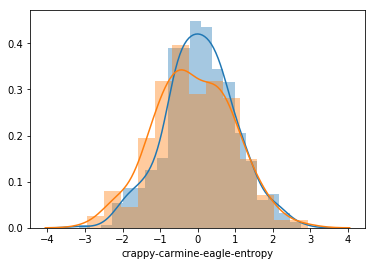

In [379]:
sns.distplot(adv.loc[:, "crappy-carmine-eagle-entropy"][0:510])
sns.distplot(adv.loc[:, "crappy-carmine-eagle-entropy"][510:760])

The difference does not seems to be significant.